# 1. Load the required libraries and read the dataset

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
'''read renttherunway.csv '''
df = pd.read_csv('renttherunway.csv',encoding='unicode_escape')

# 2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features

In [15]:
# first few samples
print(df.head())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [4]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (192544, 16)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  obje

# 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [16]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [17]:
df_dropped = df.drop(duplicate, axis=1)

# Display the resulting DataFrame
print(df_dropped)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[192544 rows x 0 columns]


# 4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’)

In [18]:
columns_to_drop = ['review_date', 'fit']
df_dropped = df.drop(columns_to_drop, axis=1)

# Display the resulting DataFrame
print(df_dropped)

        Unnamed: 0  user_id bust size  item_id  weight  rating     rented for  \
0                0   420272       34d  2260466  137lbs    10.0       vacation   
1                1   273551       34b   153475  132lbs    10.0          other   
2                2   360448       NaN  1063761     NaN    10.0          party   
3                3   909926       34c   126335  135lbs     8.0  formal affair   
4                4   151944       34b   616682  145lbs    10.0        wedding   
...            ...      ...       ...      ...     ...     ...            ...   
192539      192539    66386      34dd  2252812  140lbs    10.0           work   
192540      192540   118398       32c   682043  100lbs    10.0           work   
192541      192541    47002       36a   683251  135lbs     6.0       everyday   
192542      192542   961120       36c   126335  165lbs    10.0        wedding   
192543      192543   123612       36b   127865  155lbs    10.0        wedding   

                           

# 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [19]:
# Check the data type of 'weight' column
print(df['weight'].dtype)

# Identify rows with non-numeric values in 'weight' column
non_numeric_rows = pd.to_numeric(df['weight'], errors='coerce').isnull()

# Print the rows with non-numeric values
print("Rows with non-numeric 'weight':")
print(df[non_numeric_rows])

# Remove non-numeric values and convert 'weight' column to float
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Verify the updated data type of 'weight' column
print(df['weight'].dtype)

object
Rows with non-numeric 'weight':
        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorab

# 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'

In [20]:
# Check the unique categories in the 'rented for' column
unique_categories = df['rented for'].unique()
print("Unique categories in 'rented for':")
print(unique_categories)

# Group 'party:cocktail' category with 'party'
df['rented for'] = df['rented for'].replace('party:cocktail', 'party')

# Verify the updated categories
unique_categories_updated = df['rented for'].unique()
print("Unique categories in 'rented for' (after grouping):")
print(unique_categories_updated)

Unique categories in 'rented for':
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']
Unique categories in 'rented for' (after grouping):
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']


# 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. 

In [4]:
# Function to convert feet to inches
def convert_to_inches(feet):
    return feet * 12

# Convert height to inches
df['height'] = df['height'].apply(convert_to_inches)

# Print the DataFrame after conversion
print(df)

        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorable romper! Belt and zipper were a lit..

# 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [22]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Impute missing values with appropriate methods
# Example: Impute missing values in numeric columns with mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Example: Impute missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify the updated DataFrame
print(df)

Missing values in each column:
Unnamed: 0             0
fit                    0
user_id                0
bust size          18411
item_id                0
weight            192544
rating                82
rented for            10
review_text           68
body type          14637
review_summary       347
category               0
height               677
size                   0
age                  960
review_date            0
dtype: int64
        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466     NaN    10.0   
1                1  fit   273551       34b   153475     NaN    10.0   
2                2  fit   360448       34b  1063761     NaN    10.0   
3                3  fit   909926       34c   126335     NaN     8.0   
4                4  fit   151944       34b   616682     NaN    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812     NaN

# 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [23]:
# Statistical summary for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
numerical_summary = numerical_columns.describe()
print("Statistical summary for numerical columns:")
print(numerical_summary)

# Statistical summary for categorical columns
categorical_columns = df.select_dtypes(include=['object'])
categorical_summary = categorical_columns.describe()
print("Statistical summary for categorical columns:")
print(categorical_summary)

Statistical summary for numerical columns:
          Unnamed: 0        user_id       item_id  weight         rating  \
count  192544.000000  192544.000000  1.925440e+05     0.0  192544.000000   
mean    96271.500000  499494.100149  1.045684e+06     NaN       9.092371   
std     55582.809453  289059.719328  8.053148e+05     NaN       1.429740   
min         0.000000       9.000000  1.233730e+05     NaN       2.000000   
25%     48135.750000  250654.250000  1.950760e+05     NaN       8.000000   
50%     96271.500000  499419.000000  9.483960e+05     NaN      10.000000   
75%    144407.250000  750974.000000  1.678888e+06     NaN      10.000000   
max    192543.000000  999997.000000  2.966087e+06     NaN      10.000000   

                size            age  
count  192544.000000  192544.000000  
mean       12.245175      33.871017  
std         8.494877       8.037969  
min         0.000000       0.000000  
25%         8.000000      29.000000  
50%        12.000000      32.000000  
75%   

# 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

In [24]:
# Calculate the interquartile range (IQR) for 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'age'
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Treat outliers with appropriate method
# Example: Replace outliers with the median value
median_age = df['age'].median()
df['age'] = np.where((df['age'] < lower_bound) | (df['age'] > upper_bound), median_age, df['age'])

# Verify the updated 'age' column
print(df['age'])

0         28.0
1         36.0
2         32.0
3         34.0
4         27.0
          ... 
192539    42.0
192540    29.0
192541    31.0
192542    31.0
192543    30.0
Name: age, Length: 192544, dtype: float64


# 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot

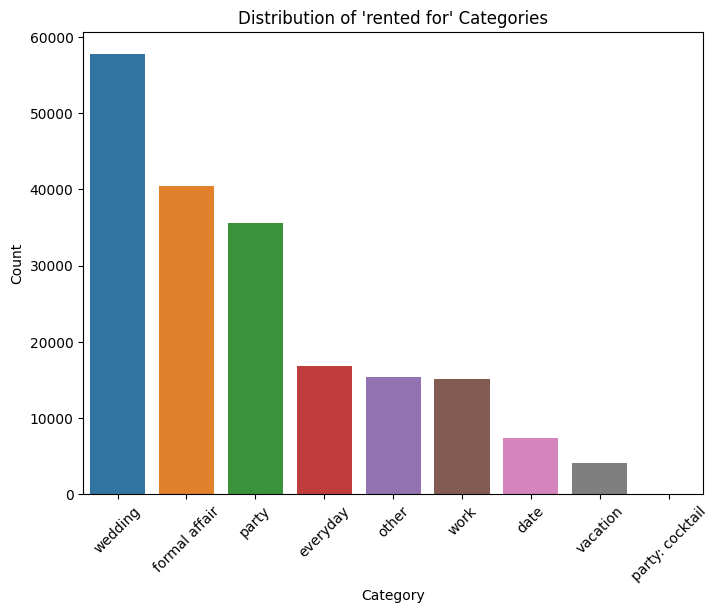

In [25]:
# Count the frequency of each category in 'rented for'
category_counts = df['rented for'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of 'rented for' Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 12. Encode the categorical variables in the dataset.

In [5]:
# One-Hot Encoding
df_encoded_onehot = pd.get_dummies(df, columns=['rented for', 'body type'])

# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['rented for_encoded'] = label_encoder.fit_transform(df['rented for'])
df['body type_encoded'] = label_encoder.fit_transform(df['body type'])

# Print the DataFrames after encoding
print("One-Hot Encoding:")
print(df_encoded_onehot)

print("\nLabel Encoding:")
print(df)

One-Hot Encoding:
        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

                                              review_text  \
0       An adorable romper! Belt and zipper were a lit...   
1      

# 13. Standardize the data, so that the values are within a particular range.

In [27]:
# Initialize the MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Select the columns to be standardized
columns_to_standardize = ['rating', 'age'] 

# Apply Min-Max scaling to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Verify the standardized DataFrame
print(df)

        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466     NaN    1.00   
1                1  fit   273551       34b   153475     NaN    1.00   
2                2  fit   360448       34b  1063761     NaN    1.00   
3                3  fit   909926       34c   126335     NaN    0.75   
4                4  fit   151944       34b   616682     NaN    1.00   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812     NaN    1.00   
192540      192540  fit   118398       32c   682043     NaN    1.00   
192541      192541  fit    47002       36a   683251     NaN    0.50   
192542      192542  fit   961120       36c   126335     NaN    1.00   
192543      192543  fit   123612       36b   127865     NaN    1.00   

           rented for                                        review_text  \
0            vacation  An adorable romper! Belt and zipper were a lit..

# 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same

In [ ]:
df = pd.DataFrame(df)

# Standardize the data (mean=0, std=1) as PCA is sensitive to scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for 90-95% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of PCA components to explain 90% variance: {n_components_90}")
print(f"Number of PCA components to explain 95% variance: {n_components_95}")

# 15 Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

In [28]:
# Extract the features for clustering
features = df[['age', 'rating', 'size']]  # Add the relevant feature columns

# Apply K-means clustering
n_clusters = 3  # Set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# View the resulting DataFrame with cluster labels
print(df)

C:\Users\91733\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466     NaN    1.00   
1                1  fit   273551       34b   153475     NaN    1.00   
2                2  fit   360448       34b  1063761     NaN    1.00   
3                3  fit   909926       34c   126335     NaN    0.75   
4                4  fit   151944       34b   616682     NaN    1.00   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812     NaN    1.00   
192540      192540  fit   118398       32c   682043     NaN    1.00   
192541      192541  fit    47002       36a   683251     NaN    0.50   
192542      192542  fit   961120       36c   126335     NaN    1.00   
192543      192543  fit   123612       36b   127865     NaN    1.00   

           rented for                                        review_text  \
0            vacation  An adorable romper! Belt and zipper were a lit..

# 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data

In [31]:
#original data
df = pd.read_csv('renttherunway.csv',encoding='unicode_escape')
print(df)

        Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorable romper! Belt and zipper were a lit..

In [41]:
df = pd.DataFrame(data)

# Standardize the data (mean=0, std=1) as clustering is sensitive to scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply Agglomerative Clustering
n_clusters = 2  # Specify the number of clusters you want
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(df)

# 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. 

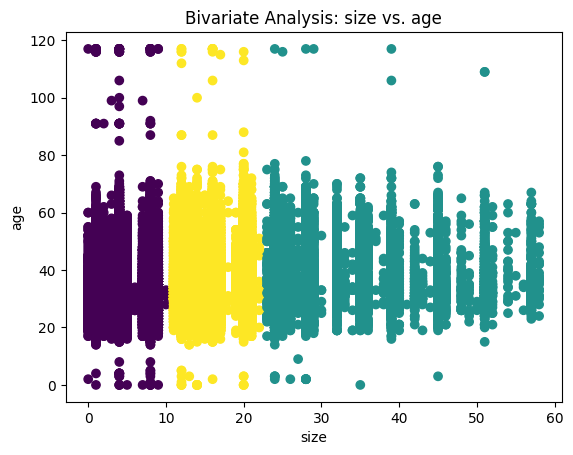

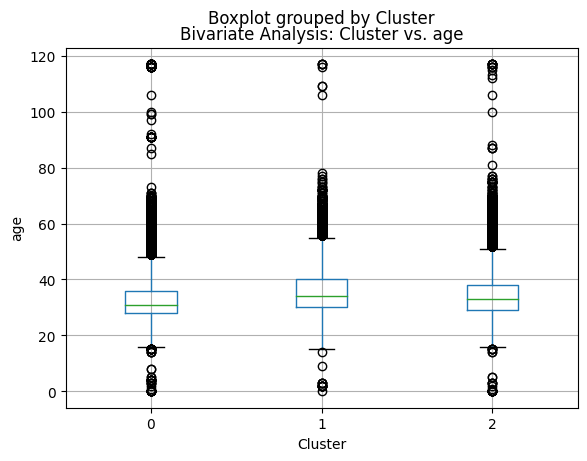

In [47]:
# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Bivariate analysis: Scatter plot
plt.scatter(df['size'], df['age'], c=df['Cluster'])
plt.xlabel('size')
plt.ylabel('age')
plt.title('Bivariate Analysis: size vs. age')
plt.show()

# Bivariate analysis: Box plot
df.boxplot(column='age', by='Cluster')
plt.xlabel('Cluster')
plt.ylabel('age')
plt.title('Bivariate Analysis: Cluster vs. age')
plt.show()